<a href="https://colab.research.google.com/github/DHARUN033/MachineLearning/blob/main/Gold_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Gold Price.csv to Gold Price.csv


In [ ]:
data=pd.read_csv('Gold Price.csv')

In [ ]:
data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2025-01-06,77149,77309,77542,76545,27160,0.44
1,2025-01-03,76813,77246,78600,76613,60,-0.05
2,2025-01-02,76849,76849,76849,76849,0,0.83
3,2025-01-01,76214,76232,76302,76053,60,-0.02
4,2024-12-31,76232,75680,76970,75572,1920,0.95


In [ ]:
data.describe()

,Price,Open,High,Low,Volume,Chg%
count,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000
mean,41221.788624,41223.038975,41443.228230,41002.117275,12592.610253,0.037324
std,14374.500657,14375.130049,14451.199655,14300.609162,10643.504531,0.829900
min,24545.000000,24583.000000,24635.000000,24470.000000,0.000000,-5.980000
25%,29168.750000,29154.000000,29294.500000,29002.000000,6307.500000,-0.380000
50%,33939.000000,33945.000000,34229.500000,33743.000000,10830.000000,0.040000
75%,50824.000000,50819.000000,51071.000000,50551.000000,16472.500000,0.460000
max,79257.000000,79264.000000,79999.000000,78888.000000,106920.000000,5.300000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2848 non-null   object 
 1   Price   2848 non-null   int64  
 2   Open    2848 non-null   int64  
 3   High    2848 non-null   int64  
 4   Low     2848 non-null   int64  
 5   Volume  2848 non-null   int64  
 6   Chg%    2848 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 155.9+ KB


In [ ]:
data.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Volume,0
Chg%,0


In [ ]:
data.isna().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Volume,0
Chg%,0


In [ ]:
data.shape

(2848, 7)

In [ ]:
data.size

19936

In [ ]:
data.ndim

2

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2843,False
2844,False
2845,False
2846,False


In [ ]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [ ]:
data['Date'].value_counts().reset_index()

,Date,count
0,2014-01-22,1
1,2014-01-23,1
2,2014-01-24,1
3,2014-01-27,1
4,2014-01-28,1
...,...,...
2843,2024-12-31,1
2844,2025-01-01,1
2845,2025-01-02,1
2846,2025-01-03,1


In [ ]:
data['Price'].value_counts().reset_index()

,Price,count
0,28588,3
1,28571,3
2,29800,3
3,46781,3
4,30605,3
...,...,...
2650,47925,1
2651,47719,1
2652,47536,1
2653,46591,1


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

In [ ]:
data

,Date,Price,Open,High,Low,Volume,Chg%,Year
0,2025-01-06,77149,77309,77542,76545,27160,0.44,2025
1,2025-01-03,76813,77246,78600,76613,60,-0.05,2025
2,2025-01-02,76849,76849,76849,76849,0,0.83,2025
3,2025-01-01,76214,76232,76302,76053,60,-0.02,2025
4,2024-12-31,76232,75680,76970,75572,1920,0.95,2024
...,...,...,...,...,...,...,...,...
2843,2014-01-06,29119,29300,29395,29051,24380,-0.55,2014
2844,2014-01-04,29279,29279,29279,29279,0,-1.51,2014
2845,2014-01-03,29727,30031,30125,29539,3050,-0.83,2014
2846,2014-01-02,29975,29678,30050,29678,3140,1.47,2014


In [ ]:
yearly_avg = data.groupby('Year')['Price'].mean().reset_index()

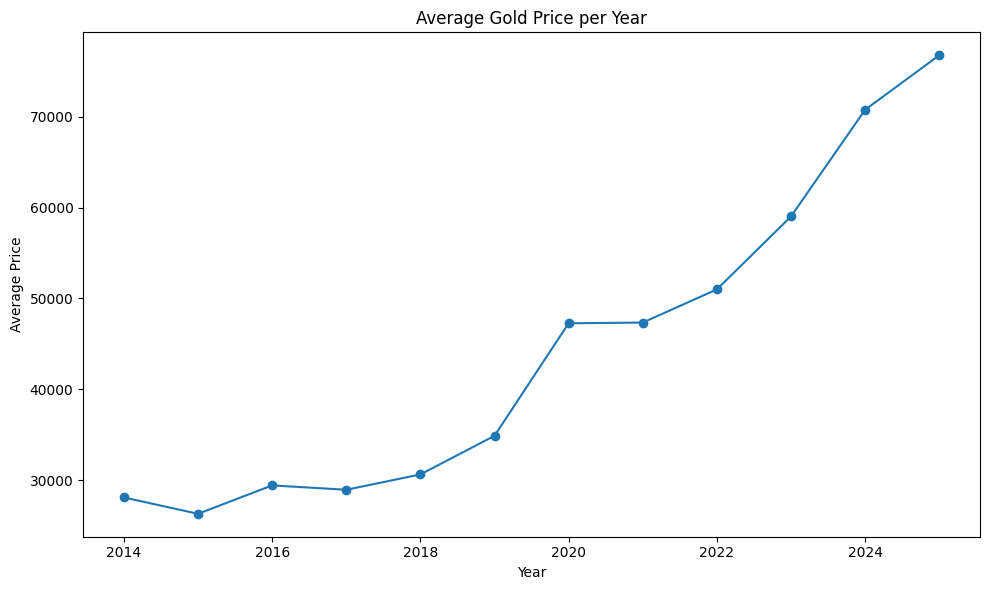

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['Year'], yearly_avg['Price'],marker='o', linestyle='-')
# plt.plot(colorizer='red')
plt.title('Average Gold Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
# plt.grid(True)
# plt.tight_layout()
plt.show()

In [ ]:
fig = px.line(
    yearly_avg,
    x='Year',
    y='Price',
    title='Average Gold Price per Year',
    markers=True,
    labels={'Price': 'Average Price', 'Year': 'Year'}
)

fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis=dict(title='Average Price'),
    template='plotly_white'
)

# fig.update_yaxes(showgrid=False)
fig.update_xaxes(showgrid=False)

fig.show()

In [ ]:
data['Month'] = data['Date'].dt.month

In [ ]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%', 'Year',
       'Month'],
      dtype='object')

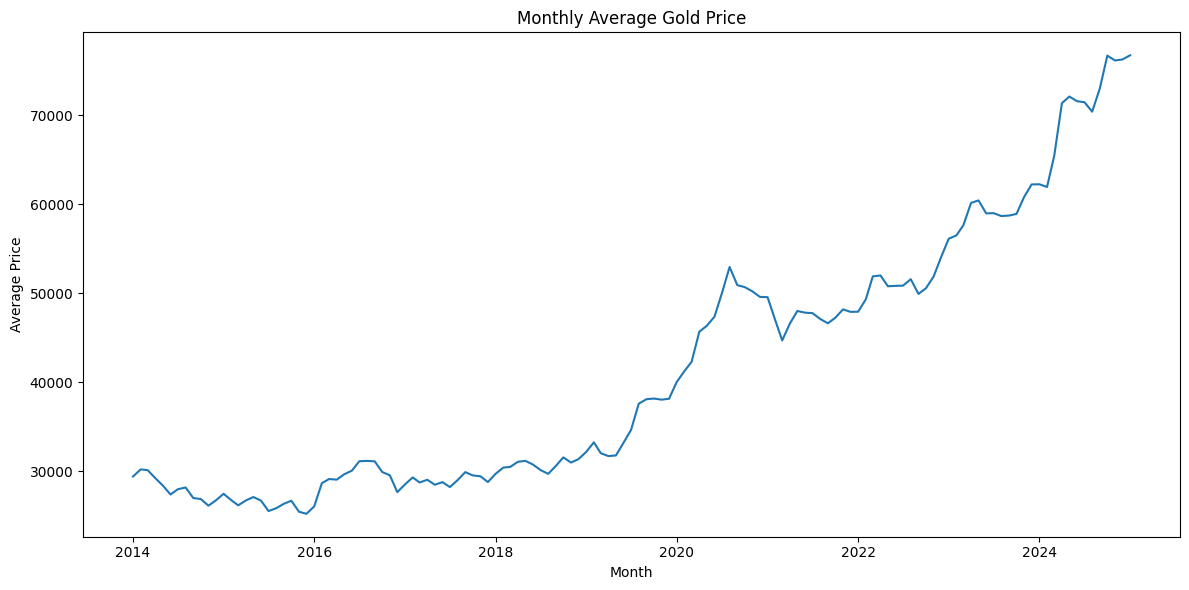

In [ ]:
monthly_avg = data.groupby([data['Year'], data['Month']])['Price'].mean().reset_index()
monthly_avg['Year-Month'] = pd.to_datetime(monthly_avg['Year'].astype(str) + '-' + monthly_avg['Month'].astype(str))
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['Year-Month'], monthly_avg['Price'])
plt.title('Monthly Average Gold Price')
plt.xlabel('Month')
plt.ylabel('Average Price')
# plt.grid(True)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

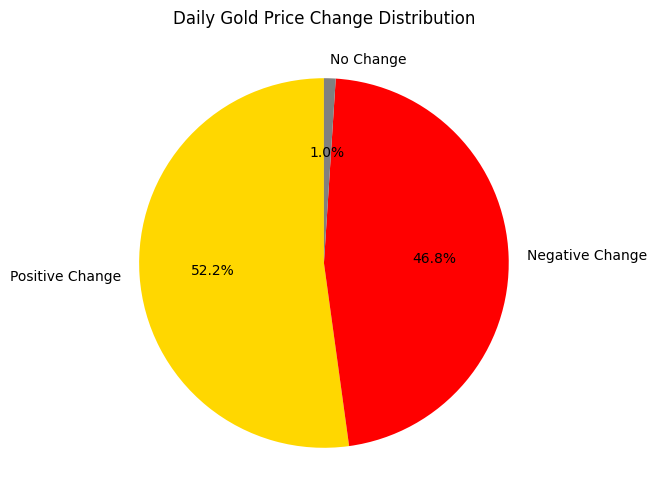

In [ ]:
positive_days = (data['Chg%'] > 0).sum()
negative_days = (data['Chg%'] < 0).sum()
neutral_days  = (data['Chg%'] == 0).sum()

counts = [positive_days, negative_days, neutral_days]
labels = ['Positive Change', 'Negative Change', 'No Change']
colors = ['gold', 'red', 'gray']

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Daily Gold Price Change Distribution')
plt.show()

In [ ]:
import plotly.express as px
df_counts = pd.DataFrame({
    'Change Type': labels,
    'Count': counts
})
fig = px.pie(
    df_counts,
    names='Change Type',
    values='Count',
    title='Daily Gold Price Change Distribution',
    color='Change Type',
    color_discrete_map={'Positive Change': 'gold', 'Negative Change': 'red', 'No Change': 'gray'}
)

fig.update_traces(textinfo='percent+label')
fig.show()

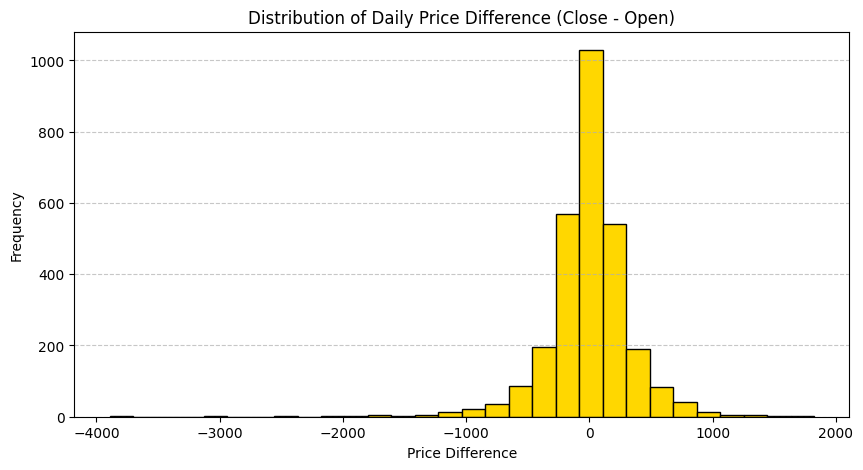

In [ ]:
data['Price_Diff'] = data['Price'] - data['Open']

# --- Histogram ---
plt.figure(figsize=(10, 5))
plt.hist(data['Price_Diff'], bins=30, color='gold', edgecolor='black')
plt.title('Distribution of Daily Price Difference (Close - Open)')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
plt.show()

In [ ]:
fig_hist = px.histogram(
    data,
    x='Price_Diff',
    nbins=30,
    title='Distribution of Daily Price Difference (Close - Open)',
    labels={'Price_Diff': 'Price Difference'},
    color_discrete_sequence=['gold']
)
fig_hist.update_layout(template='plotly_white')
fig_hist.show()

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import datetime

In [ ]:
data['DayIndex'] = np.arange(len(data))

X = data[['DayIndex']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

today_index = data['DayIndex'].max() + 1
predicted_today = model.predict([[today_index]])[0]

print(f"Predicted Close Price for Today: {predicted_today:.2f}")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R²: {r2:.2f}")

Predicted Close Price for Today: 10003.77
MSE: 150460683.08, R²: -69.71


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%', 'Year',
       'Month', 'Price_Diff', 'DayIndex'],
      dtype='object')

In [ ]:

from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
features = ['Open', 'High', 'Low', 'Volume', 'Chg%', 'Year', 'Month', 'Price_Diff']
target = 'Price'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)
print("\n--- Random Forest ---")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))



--- Random Forest ---
MSE: 38485.513907368404
R²: 0.9998081934273001
